# Random Data Generation for Machine Learning
This notebook is a summary on how to generate different data for different machine learning algorithm in order to verify our model. Commoly used package are **numpy** and **scikit-learn**.

## Numpy APIs
Numpy is more suitable for producing some simple sampling data. The APIs are all in the **random** class.

### rand

In [1]:
from numpy import random as rd

# rand: generate n dimension matrix
# rand(d0, d1, ..., dn) generates 1-dimension, 2-dimension, ..., n-dimensioni matrix
rd.rand(3, 2, 2)

array([[[0.3371129 , 0.14598367],
        [0.6398477 , 0.31328891]],

       [[0.02206239, 0.40697589],
        [0.55734366, 0.7849021 ]],

       [[0.80716217, 0.27598223],
        [0.73723046, 0.44325962]]])

### randn

In [2]:
# randn is similar to rand
# except value in it obeys the standard normal distribution of N(0,1).
rd.randn(2, 3)

array([[ 0.51585906,  1.21983563,  1.31651009],
       [ 0.82361375, -1.3961217 , -0.27838567]])

If the value need to obey $N(\mu, \sigma^2)$, just do the transformation $\sigma x+\mu$ on each generated value.

In [3]:
# N(1, 4)
2 * rd.randn(2, 3) + 1

array([[2.88234571, 2.92901429, 2.41707345],
       [2.7256707 , 5.44767002, 1.60360325]])

### randint

In [4]:
# randint(low[, high, size])
# generate data with size 'size', between[low, high)
# size can integer, dimension of matrix, or the dimension of a tensor
rd.randint(3, size=[2, 2, 2])

array([[[2, 1],
        [2, 1]],

       [[2, 2],
        [2, 2]]])

In [5]:
# 2x2x2 matrix, value in [1, 5)
rd.randint(1, 5, [2, 2, 2])

array([[[4, 2],
        [2, 2]],

       [[2, 1],
        [1, 1]]])

### random_sample

In [6]:
# Returns random float number in [0.0, 1.0)
rd.random_sample(3)

array([0.81980723, 0.46694014, 0.34605498])

In [7]:
# find in [5, 10)
(10 - 5) * rd.random_sample(10) + 5

array([7.08271446, 5.00618218, 9.57394029, 7.77144928, 9.89540732,
       5.36610513, 8.55522043, 5.7021694 , 7.36217441, 9.57794191])

## Scikit-learn APIs
Scikit-learn API for generating random data is in the **datasets** class, which, in contrast to numpy, can be used to generate data **suitable for specific machine learning models**.

### Data for regression model

We will use `make_regression` to generate such data, some key parameters are as followed:
* **n_samples**, number of samples, **default 100**
* **n_features**, number of features, **default 100**
* **noise**, the standard deviation of the gaussian noise applied to the output, **default 0.0**
* **coef**, if True, the coefficients of the underlying linear model are returned, **default False**

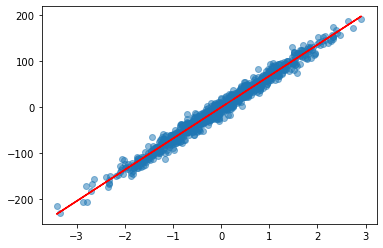

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
%matplotlib inline

X, y, coef = make_regression(n_samples=1000, n_features=1, noise=10, coef=True)
plt.scatter(X, y, alpha=0.5)
plt.plot(X, X*coef, color='red')
plt.show()

### Data for classification model
We will use `make_classification` to generate such data, some key parameters are as followed:
* **n_samples**, number of samples, **default 100**
* **n_features**, number of features, **default 20**
* **n_redundant**, The number of redundant features, **default 2**
* **n_classes**, The number of classes (or labels) of the classification problem, **default 2**
* **n_clusters_per_class**, The number of clusters per class, **default 2**

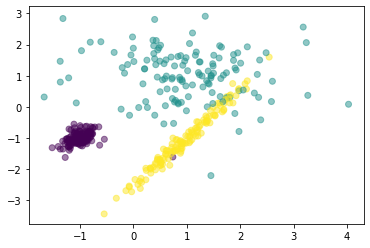

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=400, n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, c=y)
plt.show()

### Data for clustering model
We will use `make_blobs` to generate such data, some key parameters are as followed:
* **n_samples**, number of samples, **default 100**
* **n_features**, number of features, **default 2**
* **centers**, The number of centers to generate, or the fixed center locations, **default None**
* **cluster_std**, The standard deviation of the clusters., **default 1.0**

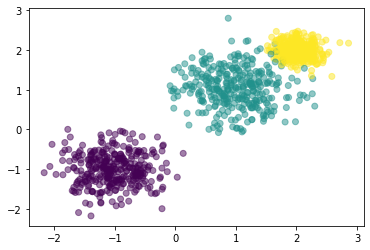

In [10]:
from sklearn.datasets import make_blobs

# X is sample feature. Y is sample cluster category
# 1,000 samples, 2 features for each sample, total 3 clusters
# the cluster center is [-1, -1], [1,1], [2,2] The cluster variance is [0.4, 0.5, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [1,1], [2,2]], cluster_std=[0.4, 0.5, 0.2])
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, c=y)
plt.show()

### Multiple Classes Normal Distribution Data
We will use `make_gaussian_quantiles` to generate such data, some key parameters are as followed:
* **n_samples**, number of samples, **default 100**
* **n_features**, number of features, **default 2**
* **mean**, The mean of the multi-dimensional normal distribution. If None then use the origin (0, 0, …), **default None**
* **cov**, The covariance matrix will be this value times the unit matrix. This dataset only produces symmetric normal distributions., **default 1.0**
* **n_classes**, number of classes, **default 3**

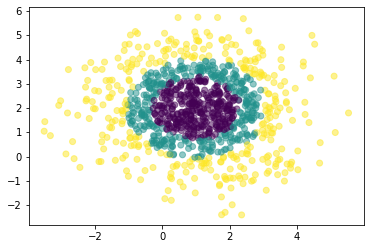

In [11]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=3, mean=[1, 2], cov=2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, c=y)
plt.show()